## FAKE NEWS DETECTOR USING NLP

### Using wget/gdown to download CSV file from Google Drive

In [1]:
!gdown 'https://drive.google.com/uc?id=1lSElBcUDTkHRfhuFUyiuSL9FY5kW-QWn'

Downloading...
From: https://drive.google.com/uc?id=1lSElBcUDTkHRfhuFUyiuSL9FY5kW-QWn
To: /Users/nathalia/Personal/code-practice/Data Science Projects/Fake News Detection using NLP/news.csv
100%|██████████████████████████████████████| 98.6M/98.6M [00:13<00:00, 7.25MB/s]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv

In [3]:
import os
working_dir = os.getcwd()
print(working_dir)

/Users/nathalia/Personal/code-practice/Data Science Projects/Fake News Detection using NLP


In [4]:
data_path = working_dir + '/news.csv'

### Turn data from CSV file into a DataFrame

In [5]:
df= read_csv(data_path)

# Results
print(f'Dataset shape: {df.shape}')
df.head()

Dataset shape: (20800, 5)


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [7]:
df.shape

(20800, 5)

In [8]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

### Drop missing values

In [9]:
df.dropna(inplace=True) #inplace=True, to upgrade dataframe too

In [10]:
df.shape

(18285, 5)

### Checking distribution of data

In [11]:
def create_distribution(feature):
    return sns.countplot(data=df, x=df[feature])
# Count plot counts the # of rows with label=1 and label=0 (it returns a bar plot)

In [12]:
df.dtypes

id         int64
title     object
author    object
text      object
label      int64
dtype: object

In [13]:
df['label']=df['label'].astype(str)

In [14]:
df.dtypes

id         int64
title     object
author    object
text      object
label     object
dtype: object

In [15]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


<AxesSubplot: xlabel='label', ylabel='count'>

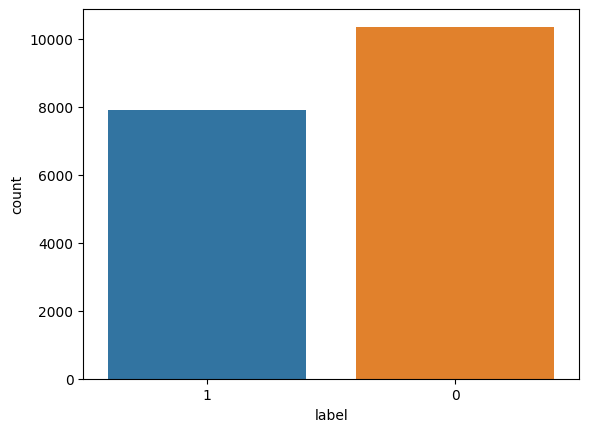

In [16]:
create_distribution('label')

We can see from the plot above that data does not follow an imbalance condition

In [17]:
df.head(20)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [18]:
messages = df.copy()

In [19]:
# Create a new index because when deleting the missing values, some indexes are missing
messages.reset_index(inplace=True)

In [20]:
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [21]:
# axis=1 -> drop vertically
messages.drop(['index','id'],axis=1,inplace=True)

In [22]:
messages.head()

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


### Pre-process title feature

title feature is one the independent features of the dataset

In [23]:
data = messages['title'][0]
data

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

##### Remove especial characters

In [24]:
import re

In [25]:
# First param: except characters to apply the replacement
# Second param: the replacement character
# Third param: to what data to apply to
re.sub('[^a-zA-Z]', ' ', data)

'House Dem Aide  We Didn t Even See Comey s Letter Until Jason Chaffetz Tweeted It'

In [26]:
# Apply lowercase operation
data = data.lower()
data

'house dem aide: we didn’t even see comey’s letter until jason chaffetz tweeted it'

In [27]:
# Convert data into vector representation

In [28]:
list = data.split()
list

['house',
 'dem',
 'aide:',
 'we',
 'didn’t',
 'even',
 'see',
 'comey’s',
 'letter',
 'until',
 'jason',
 'chaffetz',
 'tweeted',
 'it']

nltk is the NLP toolkit

In [29]:
# !pip install nltk

### Perform stemming on data

In [30]:
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nathalia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
# This is the object of the stemming
ps = PorterStemmer()

In [32]:
# This is a list comprehension
review=[ps.stem(word) for word in list if word not in set(stopwords.words('english'))]
review

['hous',
 'dem',
 'aide:',
 'didn’t',
 'even',
 'see',
 'comey’',
 'letter',
 'jason',
 'chaffetz',
 'tweet']

In [33]:
# The same function using for-loop
review1 = []
for word in list:
    if word not in set(stopwords.words('english')):
        review1.append(ps.stem(word))
review1

['hous',
 'dem',
 'aide:',
 'didn’t',
 'even',
 'see',
 'comey’',
 'letter',
 'jason',
 'chaffetz',
 'tweet']

In [34]:
# This is the data to pass to the NLP model
# It will return some kind of numbers representation with respect to the data
' '.join(review)

'hous dem aide: didn’t even see comey’ letter jason chaffetz tweet'

##### Do the former procedure to each and every row (not just row 0)

In [35]:
corpus = []
sentences = []
for i in range(0 ,len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    list = review.split()
    review=[ps.stem(word) for word in list if word not in set(stopwords.words('english'))]
    sentences = ' '.join(review)
    corpus.append(sentences)

In [36]:
corpus[0]

'hous dem aid even see comey letter jason chaffetz tweet'

In [37]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [39]:
len(corpus)

18285

### Apply Bag of Words on data -> NLP technique on data

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
# max_features = 5000 -> it means that I need 5k features from my entire vector
# ngram_range=(1,3) -> it takes a combination of 1 words, then 2 words, then 3 words
cv = CountVectorizer(max_features=5000, ngram_range=(1,3))

In [44]:
# It converts data into a vector representation
X = cv.fit_transform(corpus).toarray()

In [45]:
X.shape

(18285, 5000)

In [46]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Get Top 20 features

In [50]:
# This are my 20 features by my count vectorizer and my ngram_range
cv.get_feature_names()[0:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [52]:
# Get dependent feature
# label is the dependent feature I have to predict
messages.columns

Index(['title', 'author', 'text', 'label'], dtype='object')

In [53]:
y=messages['label']

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [100]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [101]:
X_test.shape

(4572, 5000)

In [102]:
X_train.shape

(13713, 5000)

### Apply Naive Bayes on data

In [103]:
from sklearn.naive_bayes import MultinomialNB

In [124]:
classifier = MultinomialNB()

In [125]:
classifier.fit(X_train, y_train)

MultinomialNB()

### Do prediction with respect to testing data

In [126]:
pred = classifier.predict(X_test)
pred

array(['1', '0', '0', ..., '0', '0', '0'], dtype='<U1')

##### Accuracy of the model

In [127]:
from sklearn import metrics

In [128]:
metrics.accuracy_score(y_test, pred)

0.8904199475065617

In [129]:
cm = metrics.confusion_matrix(y_test, pred)
cm

array([[2301,  299],
       [ 202, 1770]])

In [130]:
import matplotlib.pyplot as plt
import numpy as np

([<matplotlib.axis.YTick at 0x14f0fd270>,
 [Text(0, 0, 'positive'), Text(0, 1, 'negative')])

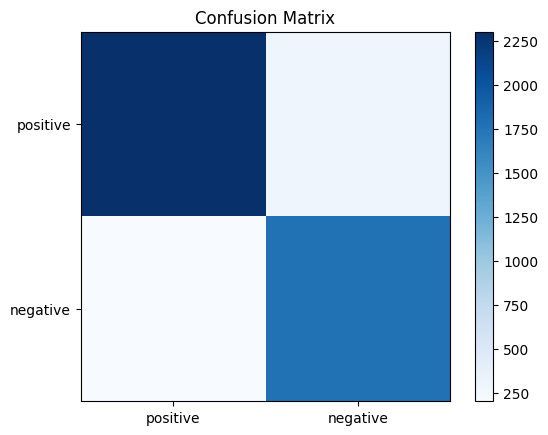

In [131]:
plt.imshow(cm, interpolation='nearest', cmap = plt.cm.Blues)
plt.colorbar()
plt.title('Confusion Matrix')
labels = ['positive', 'negative']
tick_marks = np.arange(len(labels))
# In tick_marks, there is an array [0, 1]
# Then I replace the array with [0, 1] with labels
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

In [132]:
labels = ['positive', 'negative']
np.arange(len(labels))

array([0, 1])

In [133]:
# Define a custome function for plotting the confusion matrix nicely
def plot_confusion_matrix(cm):
    plt.imshow(cm, interpolation='nearest', cmap = plt.cm.Blues)
    plt.colorbar()
    plt.title('Confusion Matrix')
    labels = ['positive', 'negative']
    tick_marks = np.arange(len(labels))
    # In tick_marks, there is an array [0, 1]
    # Then I replace the array with [0, 1] with labels
    plt.xticks(tick_marks, labels)
    plt.yticks(tick_marks, labels)
    

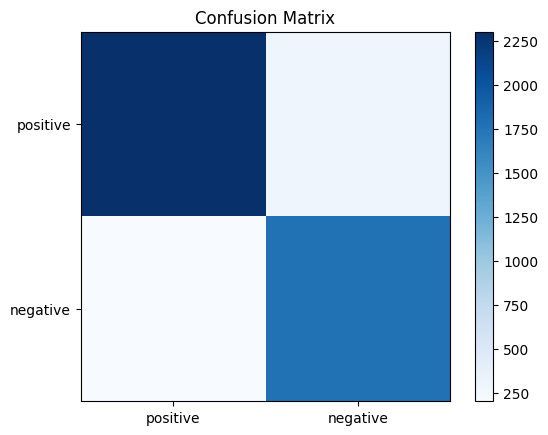

In [134]:
plot_confusion_matrix(cm)

### Apply Passive Aggressive Classifier on data

In [135]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [136]:
linear_clf = PassiveAggressiveClassifier()

In [137]:
linear_clf.fit(X_train, y_train)

PassiveAggressiveClassifier()

In [138]:
predictions = linear_clf.predict(X_test)

In [139]:
metrics.accuracy_score(y_test, predictions)

0.9103237095363079

In [140]:
cm2 = metrics.confusion_matrix(y_test, predictions) 
cm2

array([[2367,  233],
       [ 177, 1795]])

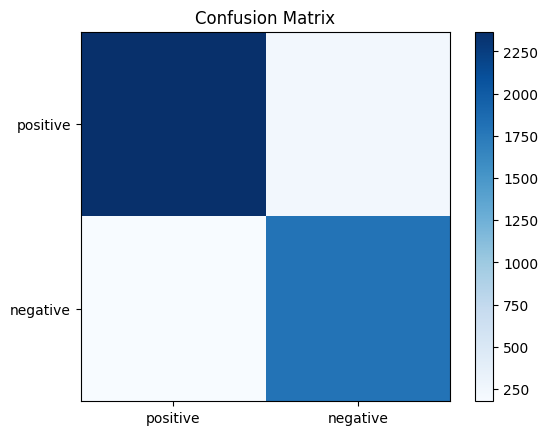

In [141]:
plot_confusion_matrix(cm2)

### Which are my most fake words in real world?

In [157]:
# These are all the features from the Count Vectorizer
feature_names = cv.get_feature_names()

/Users/nathalia/.pyenv/versions/py-3.10.7/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [163]:
feature_names

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest',
 'accid',
 'accident',
 'accord',
 'account',
 'accus',
 'accus trump',
 'achiev',
 'acknowledg',
 'acknowledg emf',
 'acknowledg emf damag',
 'aclu',
 'acquit',
 'acquitt',
 'acr',
 'across',
 'act',
 'act like',
 'act new',
 'act new york',
 'action',
 'activ',
 'activist',
 'actor',
 'actual',
 'ad',
 'adam',
 'add',
 'addict',
 'address',
 'adhd',
 'admin',
 'administr',
 'admir',
 'admit',
 'adopt',
 'adult',
 'advanc',
 'advertis',
 'advic',
 'advis',
 'advis new',
 'advis new york',
 'advisor',
 'advoc',
 'affair',
 'affect',
 'affili',
 'affirm',
 'afford',
 'afghan',
 'afghanistan',
 'africa',
 'african',
 'african american',
 'ag',
 'age',
 'age new',
 'age new york',
 'agenc',
 'agenda',
 'agenda breitbart',
 'agent',
 'aggress',
 '

The next words which have higher negative coefficient, means that any sentence or text contain that particular word may have higher chances of being faked.

In [159]:
# See what is the coeficient from my classifier ('MultinomialNB' model) with respect to each and every feature
# It is about, the higher the negative values, the most it is fake
coefs = classifier.feature_log_prob_
coefs

array([[ -9.05829051,  -9.51027564, -10.3575735 , ...,  -9.66442632,
        -11.45618579,  -9.66442632],
       [ -8.86060051,  -8.60928608,  -9.19707274, ..., -10.80651066,
         -8.72706912,  -9.4202163 ]])

In [160]:
coefs.shape

(2, 5000)

In [162]:
classifier.feature_log_prob_[0]

array([ -9.05829051,  -9.51027564, -10.3575735 , ...,  -9.66442632,
       -11.45618579,  -9.66442632])

In [161]:
### Most 20 real values
sorted(zip(classifier.feature_log_prob_[0],feature_names),reverse=True)[0:20]

[(-2.934403143227554, 'new'),
 (-2.9841991883994403, 'time'),
 (-2.98797277778308, 'york'),
 (-2.988182839752133, 'new york'),
 (-3.0047051389267434, 'york time'),
 (-3.0047051389267434, 'new york time'),
 (-3.947947012298936, 'breitbart'),
 (-4.020157970625751, 'trump'),
 (-5.303453092273495, 'donald'),
 (-5.307717491059952, 'donald trump'),
 (-5.762453648174899, 'say'),
 (-6.005147333411899, 'obama'),
 (-6.058023085459847, 'clinton'),
 (-6.152880878918523, 'state'),
 (-6.1934955980727135, 'presid'),
 (-6.252179099900804, 'brief'),
 (-6.263228936087389, 'report'),
 (-6.274402236685514, 'attack'),
 (-6.291399813054085, 'hous'),
 (-6.393590753950632, 'brief new york')]

### Remove file downloaded in the path after finishing with the project

In [164]:
os.remove(data_path)